In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

df = pd.read_csv('files/prueba_op_base_pivot_var_rpta_alt_enmascarado_trtest.csv')

print("Número de filas en cada DataFrame:")
print("prueba_op_base_pivot_var_rpta_alt_enmascarado_trtest:", len(df))

df.head(10)

Número de filas en cada DataFrame:
prueba_op_base_pivot_var_rpta_alt_enmascarado_trtest: 568251


,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,tipo_var_rpta_alt,banca,segmento,producto,producto_cons,aplicativo,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,vlr_vencido,saldo_capital,endeudamiento,desc_alternativa1,desc_alternativa2,desc_alternativa3,cant_alter_posibles,alter_posible1_2,alter_posible2_2,alter_posible3_2,cant_gestiones,cant_gestiones_binario,rpc,promesas_cumplidas,cant_promesas_cumplidas_binario,cant_acuerdo,cant_acuerdo_binario,descripcion_ranking_mejor_ult,descripcion_ranking_post_ult,marca_alt_rank,marca_alt_apli,valor_cuota_mes,pago_cuota,porc_pago_cuota,pago_mes,porc_pago_mes,pagos_tanque,marca_debito_mora,alternativa_aplicada_agr,marca_agrupada_rgo,marca_pago,marca_alternativa,marca_alternativa_orig
0,630611,219718,863073,202308,1,a_uno_tipo_1,Banca Personas,Personal,TARJETA DE CREDITO,Tarjeta de Credito,V,46,71,71,b.31-90,6056996.0,1000259.0,5808115.68,12134572.0,Reestructuración novacion,Sin alivio,Sin alivio,1,CON22,NaN,NaN,46.0,1,1.0,0,0,0.0,0,ACEPTA ALTERNATIVA,CLIENTE AL DIA,Acepta alternativa,SI,1047805.49,100000.0,0.095438,0.00,0.000000,Sin pago,NO,CONSOLIDACION,REESTRUCTURACIÓN,Sin pago,Acepta Alternativa,Acepta Alternativa
1,59412,789567,290775,202312,1,a_uno_tipo_1,Banca Personas,Personal,LIBRE INVERSION,Libre Inversion,L,16,24,0,a.1-30,9877235.0,443638.0,9451816.00,15479703.0,Prorroga más Ampliación de plazo,Prorroga,Consolidación de pasivos,2,CON02,NaN,CON03,10.0,1,1.0,0,0,0.0,0,ACEPTA ALTERNATIVA,NO ACEPTA ACUERDO,Acepta alternativa,SI,443837.00,0.0,0.000000,0.00,NaN,Sin pago,NO,PRORROGA,MANTENIMIENTO,Sin pago,Acepta Alternativa,Acepta Alternativa
2,277595,1045909,34433,202312,1,b_uno_tipo_2,Banca Personas,Personal,LIBRE INVERSION,Libre Inversion,L,36,65,65,b.31-90,79487960.0,7650063.0,75144222.95,95148044.0,Combo modificación,Prórroga modificación,Modificación novacion,3,CON23,CON25,CON21,50.0,1,0.0,0,0,0.0,0,PLAN DE COMPROMISO CUMPLIDO,ACEPTA ALTERNATIVA,Cliente compromiso de pago,NO,5122226.00,0.0,0.000000,0.00,NaN,Sin pago,NO,NaN,NaN,Sin pago,Acepta Alternativa,Acepta Alternativa
3,26897,585786,494556,202311,1,a_uno_tipo_1,Banca Personas,Personal,ROTATIVOS,Rotativos,L,18,40,0,a.1-30,4022153.0,266898.0,3785620.00,47499162.0,Prorroga más Ampliación de plazo,Prorroga,Consolidación de pasivos,2,CON02,NaN,CON03,12.0,1,1.0,0,0,4.0,1,PLAN DE PAGO,ACEPTA ALTERNATIVA,Cliente compromiso de pago,SI,266898.00,11241.0,0.042117,4090.00,0.015324,Con pago,NO,PRORROGA,MANTENIMIENTO,Pago parcial,Acepta Alternativa,Acepta Alternativa
4,24588,1061389,18953,202311,1,b_uno_tipo_2,Banca Personas,Personal plus,ROTATIVOS,Rotativos,L,18,32,32,a.1-30,822626.0,43471.0,787131.00,241003241.0,Combo reestructuracion,Prórroga reestructuración,Reestructuración novacion,3,CON24,CON26,CON22,10.0,1,1.0,0,0,0.0,0,ACEPTA ALTERNATIVA,NO CONTESTA,Acepta alternativa,NO,43492.00,0.0,0.000000,0.00,0.000000,Sin pago,NO,CONSOLIDACION,REESTRUCTURACIÓN,Sin pago,Acepta Alternativa,Acepta Alternativa
5,431682,820319,260023,202309,1,b_uno_tipo_2,Independientes,Micropyme,CARTERA ORDINARIA,Cartera Ordinaria,L,15,39,0,a.1-30,37271605.0,10069249.0,32110245.32,37271605.0,Ampliación De Plazo Con Recalculo de Cuota,Consolidación Periodo De Gracia A Capital Con ...,Sin alivio,2,AH1,G1,NaN,22.0,1,1.0,0,0,0.0,0,ACEPTA ALTERNATIVA,MENSAJE INFORMATIVO - SIN CONTACTO,Acepta alternativa,NO,10039601.90,5520.5,0.000550,1464792.57,0.145901,Con pago,NO,NaN,NaN,Pago Total,Acepta Alternativa,Acepta Alternativa
6,353850,842237,238105,202311,0,e_cero_tipo_2,Independientes,Micropyme,CARTERA ORDINARIA,Cartera Ordinaria,L,23,52,52,a.1-30,28726342.0,2296606.0,27476146.13,28726342.0,Ampliación De Plazo Con Recalculo de Cuota,Consolidación Periodo De Gracia A Capital Con ...,Sin alivio,2,AH1,G1,NaN,42.0,1,1.0,0,0,2.0,1,PLAN DE PAGO,NO CONTESTA,Cliente compromiso de pago,NO,2272437.56,0.0,0.000000,0.00,NaN,Sin pago,NO,NaN,NaN,Sin pago,N.A,N.A
7,377361,895357,184985,202310,0,e_cero_tipo_2,Banca Persona

In [2]:
print(df.columns)
print(df.info())
print(df['var_rpta_alt'].value_counts(normalize=True))

Index(['nit_enmascarado', 'num_oblig_orig_enmascarado',
       'num_oblig_enmascarado', 'fecha_var_rpta_alt', 'var_rpta_alt',
       'tipo_var_rpta_alt', 'banca', 'segmento', 'producto', 'producto_cons',
       'aplicativo', 'min_mora', 'max_mora', 'dias_mora_fin', 'rango_mora',
       'vlr_obligacion', 'vlr_vencido', 'saldo_capital', 'endeudamiento',
       'desc_alternativa1', 'desc_alternativa2', 'desc_alternativa3',
       'cant_alter_posibles', 'alter_posible1_2', 'alter_posible2_2',
       'alter_posible3_2', 'cant_gestiones', 'cant_gestiones_binario', 'rpc',
       'promesas_cumplidas', 'cant_promesas_cumplidas_binario', 'cant_acuerdo',
       'cant_acuerdo_binario', 'descripcion_ranking_mejor_ult',
       'descripcion_ranking_post_ult', 'marca_alt_rank', 'marca_alt_apli',
       'valor_cuota_mes', 'pago_cuota', 'porc_pago_cuota', 'pago_mes',
       'porc_pago_mes', 'pagos_tanque', 'marca_debito_mora',
       'alternativa_aplicada_agr', 'marca_agrupada_rgo', 'marca_pago',
      

# Imputación de datos
La imputación de valores faltantes debe adaptarse a la naturaleza de cada característica. Para variables de conteo como 
cant\_acuerdo y cant\_gestiones, la mediana es adecuada debido a su distribución sesgada. Para variables monetarias como 
vlr\_obligacion, valor\_cuota\_mes, y pago\_cuota, se recomienda imputar con la mediana, aunque un valor cero podría 
ser usado si los nulos indican ausencia de deuda o pago. Para la variable binaria rpc, es mejor usar la moda, para conservar la distribución original.

In [3]:
df.isna().sum()[df.isna().sum() != 0].sort_values(ascending=False)

alternativa_aplicada_agr    362989
marca_agrupada_rgo          362988
alter_posible3_2            342865
alter_posible2_2            334102
porc_pago_mes               308114
cant_acuerdo                 18630
cant_gestiones               18549
vlr_obligacion                 666
valor_cuota_mes                  3
pago_cuota                       3
rpc                              2
dtype: int64

In [4]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'alternativa_aplicada_agr',
    'marca_agrupada_rgo',
    'alter_posible3_2',
    'alter_posible2_2',
    'porc_pago_mes'
]

df = df.drop(columns=columnas_a_eliminar)

In [5]:
df.isna().sum()[df.isna().sum() != 0].sort_values(ascending=False)

cant_acuerdo       18630
cant_gestiones     18549
vlr_obligacion       666
valor_cuota_mes        3
pago_cuota             3
rpc                    2
dtype: int64

In [6]:
df[['cant_acuerdo', 'cant_gestiones', 'vlr_obligacion', 'valor_cuota_mes', 'pago_cuota', 'rpc']].describe()

,cant_acuerdo,cant_gestiones,vlr_obligacion,valor_cuota_mes,pago_cuota,rpc
count,549621.000000,549702.000000,5.675850e+05,5.682480e+05,5.682480e+05,568249.000000
mean,1.113153,33.527613,1.167352e+07,1.009576e+06,8.378963e+05,0.933244
std,2.139857,27.081165,2.480034e+07,2.780321e+06,7.176204e+06,0.249599
min,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,14.000000,1.575662e+06,1.833808e+05,0.000000e+00,1.000000
50%,0.000000,28.000000,4.168354e+06,4.513657e+05,0.000000e+00,1.000000
75%,2.000000,44.000000,1.082820e+07,1.028785e+06,8.587682e+04,1.000000
max,56.000000,1030.000000,1.589994e+09,5.023519e+08,2.415000e+09,1.000000


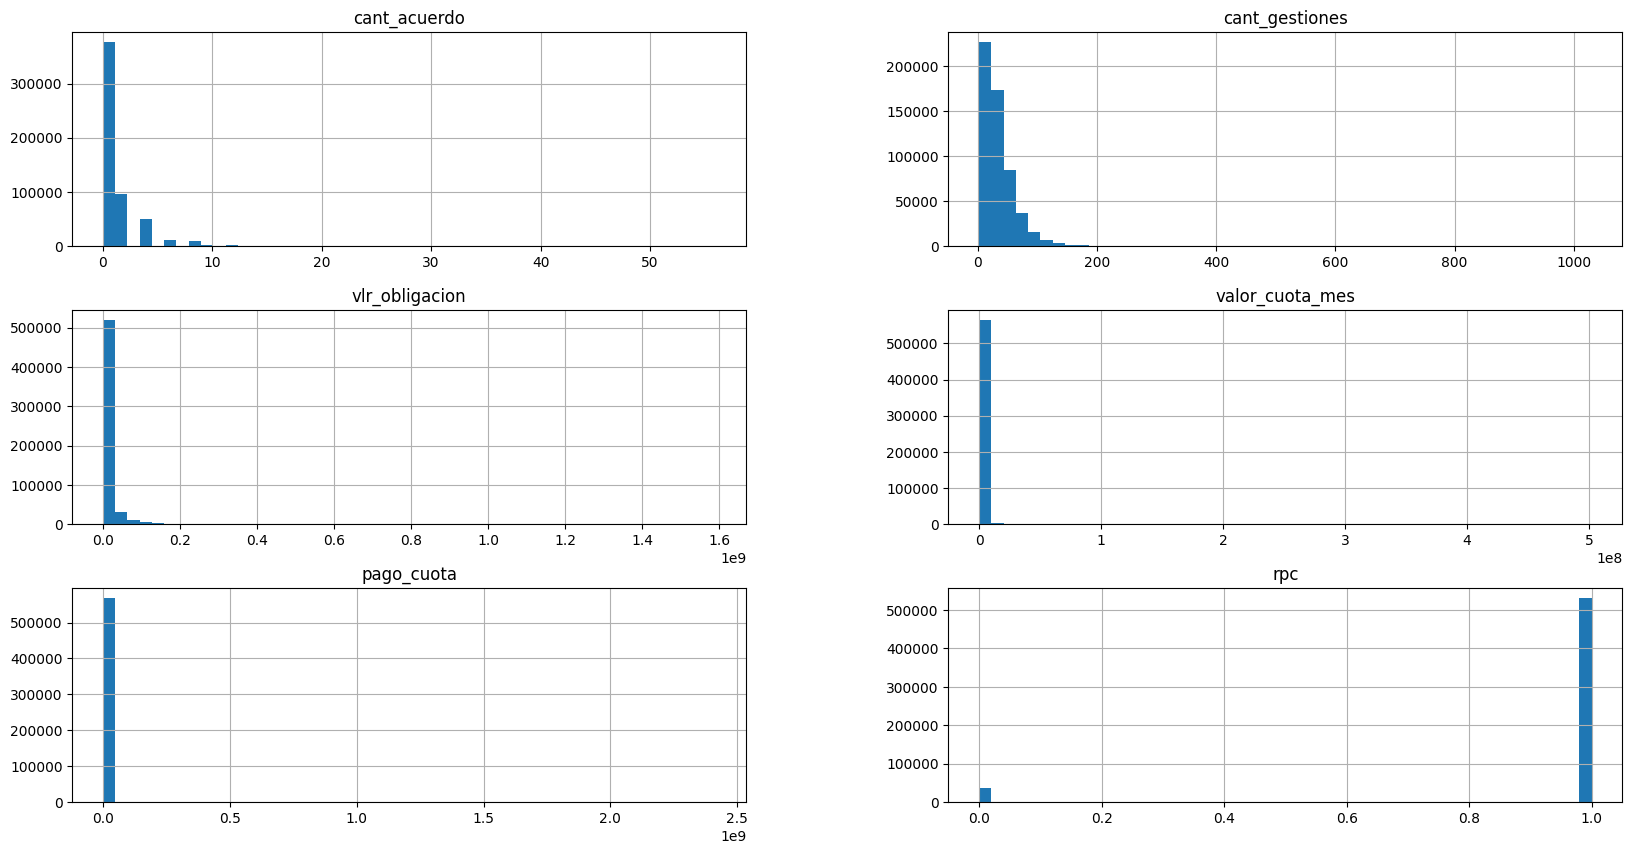

In [8]:
#Verificar gráficamente la distribución de las variables que faltan por imputar para buscar la mejor forma de imputarlos
df[['cant_acuerdo', 'cant_gestiones', 'vlr_obligacion', 'valor_cuota_mes', 'pago_cuota', 'rpc']].hist(figsize=(20,10),bins=50)
plt.savefig('latex/histograma_imputables.png')

In [9]:
df['cant_acuerdo'] = df['cant_acuerdo'].fillna(df['cant_acuerdo'].median())
df['cant_gestiones'] = df['cant_gestiones'].fillna(df['cant_gestiones'].median())

df['vlr_obligacion'] = df['vlr_obligacion'].fillna(df['vlr_obligacion'].median())
df['valor_cuota_mes'] = df['valor_cuota_mes'].fillna(df['valor_cuota_mes'].median())
df['pago_cuota'] = df['pago_cuota'].fillna(df['pago_cuota'].median())

df['rpc'] = df['rpc'].fillna(df['rpc'].mode()[0])

# Analisis técnico de datos
-  Distribución de la variable objetivo: La variable 'var\_rpta\_alt' tiene una distribución desbalanceada, con aproximadamente 52\% de 0's y 48\% de 1's. Esto sugiere que el problema está relativamente equilibrado, pero podría beneficiarse de técnicas de balanceo de clases.

-  Correlaciones: Varias variables muestran correlaciones significativas con 'var\_rpta\_alt', como 'cant\_promesas\_cumplidas\_binario' y 'cant\_acuerdo\_binario'. 
Estas podrían ser predictores importantes para nuestro modelo.

-  Valores faltantes: La mayoría de las variables tienen pocos o ningún valor faltante, lo cual es positivo. Sin embargo, 'porc\_pago\_mes' tiene un alto porcentaje de valores faltantes (54.22\%), lo que requerirá atención especial.

-  Outliers: Varias variables numéricas presentan outliers significativos, especialmente 'vlr\_obligacion', 'vlr\_vencido', y 'saldo\_capital'. Esto sugiere la necesidad de técnicas robustas de escalado o transformación.

-  Normalidad: Ninguna de las variables numéricas sigue una distribución normal (todos los p-values son 0.0). Esto indica que deberíamos considerar modelos que no asuman normalidad o aplicar transformaciones.

-  Variables categóricas: Algunas variables categóricas tienen alta cardinalidad, lo que podría requerir técnicas de codificación específicas.

In [10]:
columnas_a_convertir_en_categoricas = [
'nit_enmascarado',
'num_oblig_orig_enmascarado',
'num_oblig_enmascarado',]

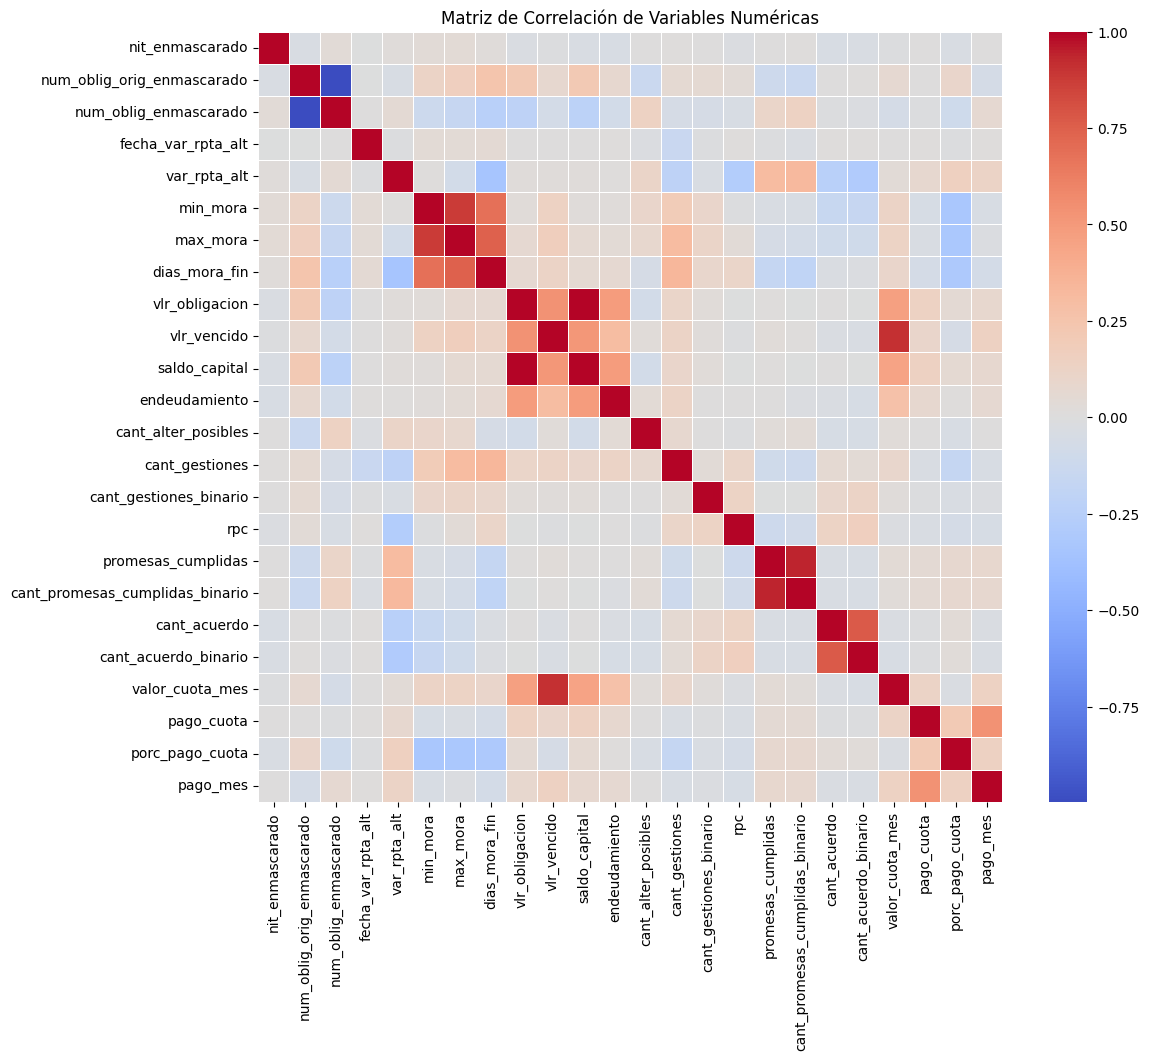

var_rpta_alt                       1.000000
cant_promesas_cumplidas_binario    0.327990
promesas_cumplidas                 0.309341
porc_pago_cuota                    0.149906
pago_mes                           0.119021
cant_alter_posibles                0.116634
pago_cuota                         0.076249
num_oblig_enmascarado              0.049799
valor_cuota_mes                    0.036542
saldo_capital                      0.023142
vlr_obligacion                     0.021852
nit_enmascarado                    0.019771
vlr_vencido                        0.018021
endeudamiento                      0.011799
min_mora                           0.010455
fecha_var_rpta_alt                -0.009844
cant_gestiones_binario            -0.031185
num_oblig_orig_enmascarado        -0.044118
max_mora                          -0.078294
cant_gestiones                    -0.214156
cant_acuerdo                      -0.240508
rpc                               -0.277463
cant_acuerdo_binario            

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.savefig
plt.show()

# Mostrar las correlaciones más fuertes con la variable objetivo var_rpta_alt
correlations_with_target = correlation_matrix['var_rpta_alt'].sort_values(ascending=False)
print(correlations_with_target)

## la cantidad de acuerdos y gestiones tiene correlación negativa. Qué sugiere?:

Los clientes con más acuerdos o gestiones previas son menos propensos a aceptar nuevas opciones de pago.
Posiblemente, estos clientes ya han agotado sus opciones o están más resistentes a nuevas propuestas.
Podría indicar fatiga del cliente o desconfianza hacia nuevas ofertas después de múltiples interacciones.
Sugiere que la estrategia de gestión actual podría no ser efectiva para ciertos clientes.



In [12]:
import pandas as pd
import numpy as np
from scipy import stats

print("\nValores únicos en columnas categóricas:")
for col in df.select_dtypes(include=['object']):
    print(f"{col}: {df[col].nunique()} valores únicos")



Valores únicos en columnas categóricas:
tipo_var_rpta_alt: 5 valores únicos
banca: 4 valores únicos
segmento: 7 valores únicos
producto: 24 valores únicos
producto_cons: 21 valores únicos
aplicativo: 7 valores únicos
rango_mora: 2 valores únicos
desc_alternativa1: 29 valores únicos
desc_alternativa2: 12 valores únicos
desc_alternativa3: 6 valores únicos
alter_posible1_2: 37 valores únicos
descripcion_ranking_mejor_ult: 24 valores únicos
descripcion_ranking_post_ult: 31 valores únicos
marca_alt_rank: 9 valores únicos
marca_alt_apli: 2 valores únicos
pagos_tanque: 2 valores únicos
marca_debito_mora: 2 valores únicos
marca_pago: 4 valores únicos
marca_alternativa: 3 valores únicos
marca_alternativa_orig: 3 valores únicos


In [13]:
print("\nOutliers en columnas numéricas:")
for col in df.select_dtypes(include=[np.number]):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {outliers} outliers")


Outliers en columnas numéricas:
nit_enmascarado: 0 outliers
num_oblig_orig_enmascarado: 0 outliers
num_oblig_enmascarado: 0 outliers
fecha_var_rpta_alt: 0 outliers
var_rpta_alt: 0 outliers
min_mora: 0 outliers
max_mora: 2647 outliers
dias_mora_fin: 481 outliers
vlr_obligacion: 64896 outliers
vlr_vencido: 56223 outliers
saldo_capital: 65647 outliers
endeudamiento: 49916 outliers
cant_alter_posibles: 32 outliers
cant_gestiones: 23686 outliers
cant_gestiones_binario: 18549 outliers
rpc: 37934 outliers
promesas_cumplidas: 54392 outliers
cant_promesas_cumplidas_binario: 54392 outliers
cant_acuerdo: 27504 outliers
cant_acuerdo_binario: 0 outliers
valor_cuota_mes: 53822 outliers
pago_cuota: 115621 outliers
porc_pago_cuota: 119372 outliers
pago_mes: 123463 outliers


In [14]:

print("\nFrecuencias de las principales categorías:")
for col in df.select_dtypes(include=['object']):
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True).head())


Frecuencias de las principales categorías:

tipo_var_rpta_alt:
tipo_var_rpta_alt
e_cero_tipo_2    0.489572
a_uno_tipo_1     0.314206
b_uno_tipo_2     0.131460
c_uno_tipo_3     0.034347
d_cero_tipo_1    0.030414
Name: proportion, dtype: float64

banca:
banca
Banca Personas    0.867053
Independientes    0.099861
Banca Pyme        0.033080
Empresas          0.000005
Name: proportion, dtype: float64

segmento:
segmento
Personal         0.636639
Personal plus    0.193601
Micropyme        0.099861
Pymes            0.033080
Social           0.031688
Name: proportion, dtype: float64

producto:
producto
TARJETA DE CREDITO    0.428371
LIBRE INVERSION       0.354474
ROTATIVOS             0.142073
CARTERA ORDINARIA     0.020970
LIBRANZA              0.018196
Name: proportion, dtype: float64

producto_cons:
producto_cons
Tarjeta de Credito    0.428772
Libre Inversion       0.354535
Rotativos             0.142073
Cartera Ordinaria     0.020970
Libranza              0.018207
Name: proportion, dtype:

In [15]:
from scipy import stats

# Análisis de promesas de pago
print("\n------------------------------------------------------------------------------")
print("Análisis de promesas de pago:")
print(df.groupby('cant_promesas_cumplidas_binario')['var_rpta_alt'].mean())
print("------------------------------------------------------------------------------")

# Análisis de acuerdos de pago
print("\n------------------------------------------------------------------------------")
print("Análisis de acuerdos de pago:")
print(df.groupby('cant_acuerdo_binario')['var_rpta_alt'].mean())
print("------------------------------------------------------------------------------")


# Análisis por segmento
print("\n------------------------------------------------------------------------------")
print("Análisis por segmento:")
print(df.groupby('segmento')[['porc_pago_cuota', 'var_rpta_alt']].mean())
print("------------------------------------------------------------------------------")

# Correlación entre número de gestiones y probabilidad de pago
print("\n------------------------------------------------------------------------------")
print("\nCorrelación entre gestiones y pago:")
print(df[['cant_gestiones', 'var_rpta_alt']].corr())
print("------------------------------------------------------------------------------")

# Análisis de RPC y tasa de pago
print("\n------------------------------------------------------------------------------")
print("\nAnálisis de RPC y tasa de pago:")
df['high_rpc_low_payment'] = (df['rpc'] > df['rpc'].mean()) & (df['porc_pago_cuota'] < df['porc_pago_cuota'].mean())
print(df.groupby('high_rpc_low_payment')['var_rpta_alt'].mean())
print("------------------------------------------------------------------------------")


------------------------------------------------------------------------------
Análisis de promesas de pago:
cant_promesas_cumplidas_binario
0    0.426701
1    0.983674
Name: var_rpta_alt, dtype: float64
------------------------------------------------------------------------------

------------------------------------------------------------------------------
Análisis de acuerdos de pago:


cant_acuerdo_binario
0    0.576718
1    0.259443
Name: var_rpta_alt, dtype: float64
------------------------------------------------------------------------------

------------------------------------------------------------------------------
Análisis por segmento:
               porc_pago_cuota  var_rpta_alt
segmento                                    
Empresarial           0.215968      0.333333
Micropyme             0.225093      0.403200
Personal              0.239370      0.503282
Personal plus         0.252340      0.507690
Preferencial          0.224986      0.337912
Pymes                 0.181898      0.227843
Social                0.235999      0.371744
------------------------------------------------------------------------------

------------------------------------------------------------------------------

Correlación entre gestiones y pago:
                cant_gestiones  var_rpta_alt
cant_gestiones        1.000000     -0.214156
var_rpta_alt         -0.214156      1.00000

Tasa de aceptación por cuartil de deuda:
cuartil_deuda
(-0.001, 1577906.5]           0.406580
(1577906.5, 4168354.0]        0.487745
(4168354.0, 10814241.5]       0.517544
(10814241.5, 1589994069.0]    0.508253
Name: var_rpta_alt, dtype: float64

Características del cuartil de deuda más alto:
                                    var_rpta_alt
segmento      producto                          
Pymes         LIBRANZA                  1.000000
Personal      TARJETA DE CREDITO        0.636082
Personal plus TARJETA DE CREDITO        0.631025
              CARTERA MICROCREDITO      0.607843
              LIBRE INVERSION           0.559334
Micropyme     TARJETA DE CREDITO        0.547605
              CARTERA MICROCREDITO      0.547317
Personal      LIBRE INVERSION           0.533103
              ROTATIVOS                 0.525544
Pymes         TESORERIA                 0.517241

Prueba T para alto RPC, bajo pago vs otros: p-valor = 0.0


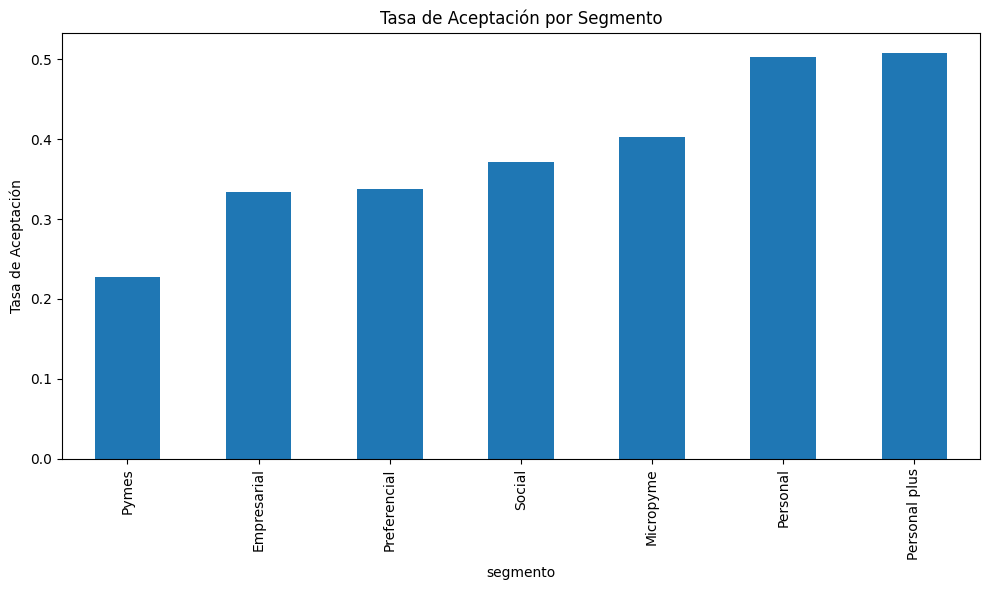

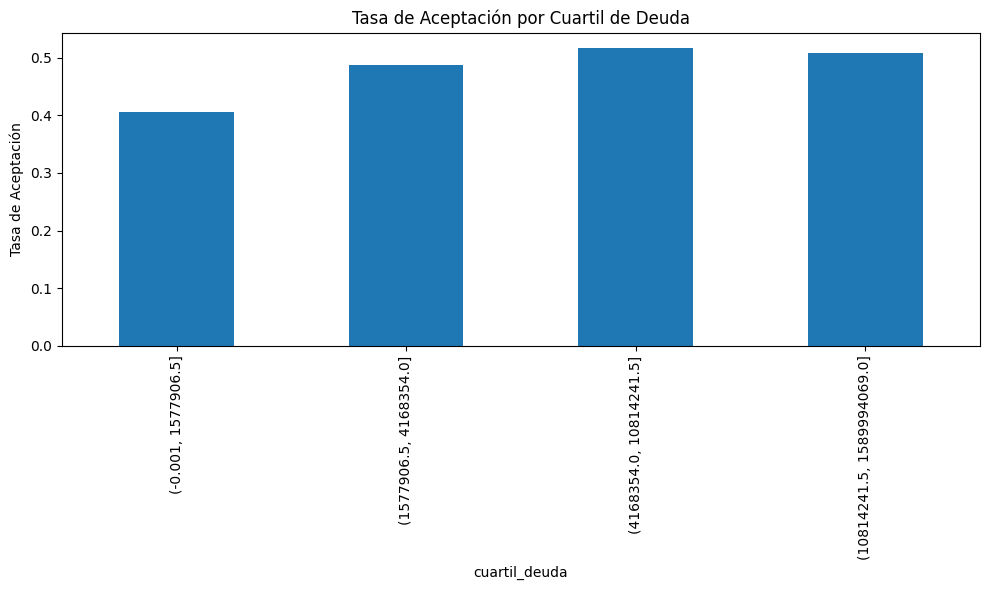

In [16]:
import matplotlib.pyplot as plt

# Visualizar tasa de aceptación por segmento
plt.figure(figsize=(10,6))
df.groupby('segmento')['var_rpta_alt'].mean().sort_values().plot(kind='bar')
plt.title('Tasa de Aceptación por Segmento')
plt.ylabel('Tasa de Aceptación')
plt.tight_layout()
plt.savefig('latex/aceptacion_por_segmento.png')

# Analizar la relación entre monto de deuda y tasa de aceptación
df['cuartil_deuda'] = pd.qcut(df['vlr_obligacion'], q=4)
aceptacion_deuda = df.groupby('cuartil_deuda', observed=False)['var_rpta_alt'].mean()
print("Tasa de aceptación por cuartil de deuda:")
print(aceptacion_deuda)

# Visualizar tasa de aceptación por cuartil de deuda
plt.figure(figsize=(10,6))
aceptacion_deuda.plot(kind='bar')
plt.title('Tasa de Aceptación por Cuartil de Deuda')
plt.ylabel('Tasa de Aceptación')
plt.tight_layout()
plt.savefig('latex/aceptacion_por_deuda.png')

# Análisis adicional para el cuartil de deuda más alto
df_alto_deuda = df[df['cuartil_deuda'] == df['cuartil_deuda'].cat.categories[-1]]
print("\nCaracterísticas del cuartil de deuda más alto:")
print(df_alto_deuda[['segmento', 'producto', 'var_rpta_alt']].groupby(['segmento', 'producto']).mean().sort_values('var_rpta_alt', ascending=False).head(10))

# T test para alto RPC, bajo pago vs otros
alto_rpc_bajo_pago = df[df['high_rpc_low_payment']]['var_rpta_alt']
otros = df[~df['high_rpc_low_payment']]['var_rpta_alt']
t_stat, p_value = stats.ttest_ind(alto_rpc_bajo_pago, otros)
print(f"\nPrueba T para alto RPC, bajo pago vs otros: p-valor = {p_value}")


-----------------------------------------------------------------------------------------
Resultado ANOVA para cuartiles de deuda: F=1463.5399356139667, p=0.0
-----------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------
Correlaciones con la tasa de aceptación:
-----------------------------------------------------------------------------------------
var_rpta_alt                       1.000000
cant_promesas_cumplidas_binario    0.327990
promesas_cumplidas                 0.309341
porc_pago_cuota                    0.149906
pago_mes                           0.119021
cant_alter_posibles                0.116634
pago_cuota                         0.076249
num_oblig_enmascarado              0.049799
valor_cuota_mes                    0.036542
saldo_capital                      0.023142
Name: var_rpta_alt, dtype: float64


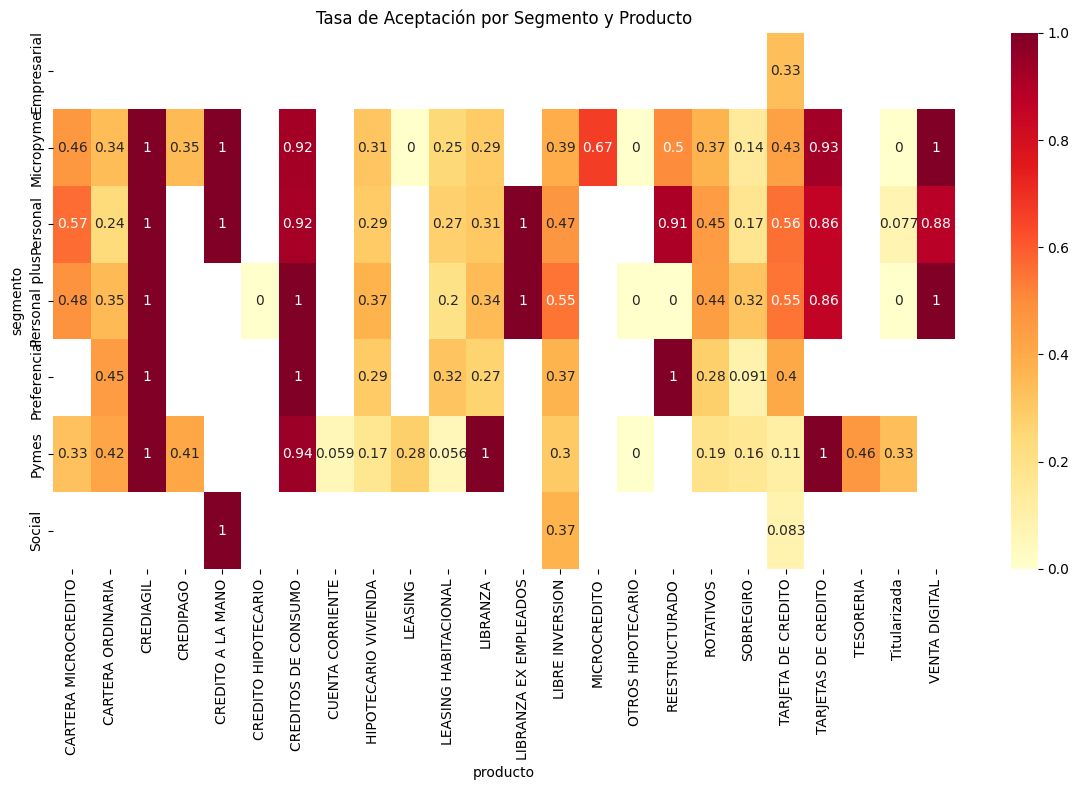

In [17]:

df['var_rpta_alt'] = pd.to_numeric(df['var_rpta_alt'], errors='coerce')

# tasa de aceptación por cuartil de deuda
df['cuartil_deuda'] = pd.qcut(df['vlr_obligacion'], q=4)
aceptacion_deuda = df.groupby('cuartil_deuda', observed=False)['var_rpta_alt'].mean()

# Análisis de la tasa de aceptación por producto y segmento
tasa_aceptacion = df.groupby(['segmento', 'producto'])['var_rpta_alt'].mean().unstack()
plt.figure(figsize=(12,8))
sns.heatmap(tasa_aceptacion, annot=True, cmap='YlOrRd')
plt.title('Tasa de Aceptación por Segmento y Producto')
plt.tight_layout()
plt.savefig('latex/heatmap_aceptacion_segmento_producto.png')

# Prueba ANOVA para diferencias entre cuartiles de deuda
cuartiles = [grupo for _, grupo in df.groupby('cuartil_deuda')]
f_statistic, p_value = stats.f_oneway(*[grupo['var_rpta_alt'].dropna() for grupo in cuartiles])
print("\n-----------------------------------------------------------------------------------------")
print(f"Resultado ANOVA para cuartiles de deuda: F={f_statistic}, p={p_value}")
print("-----------------------------------------------------------------------------------------")

# Análisis de correlación entre variables numéricas y tasa de aceptación
df_numeric = df.select_dtypes(include=[np.number])
correlaciones = df_numeric.corr()['var_rpta_alt'].sort_values(ascending=False)
print("\n-----------------------------------------------------------------------------------------")
print("Correlaciones con la tasa de aceptación:")
print("-----------------------------------------------------------------------------------------")
print(correlaciones.head(10))

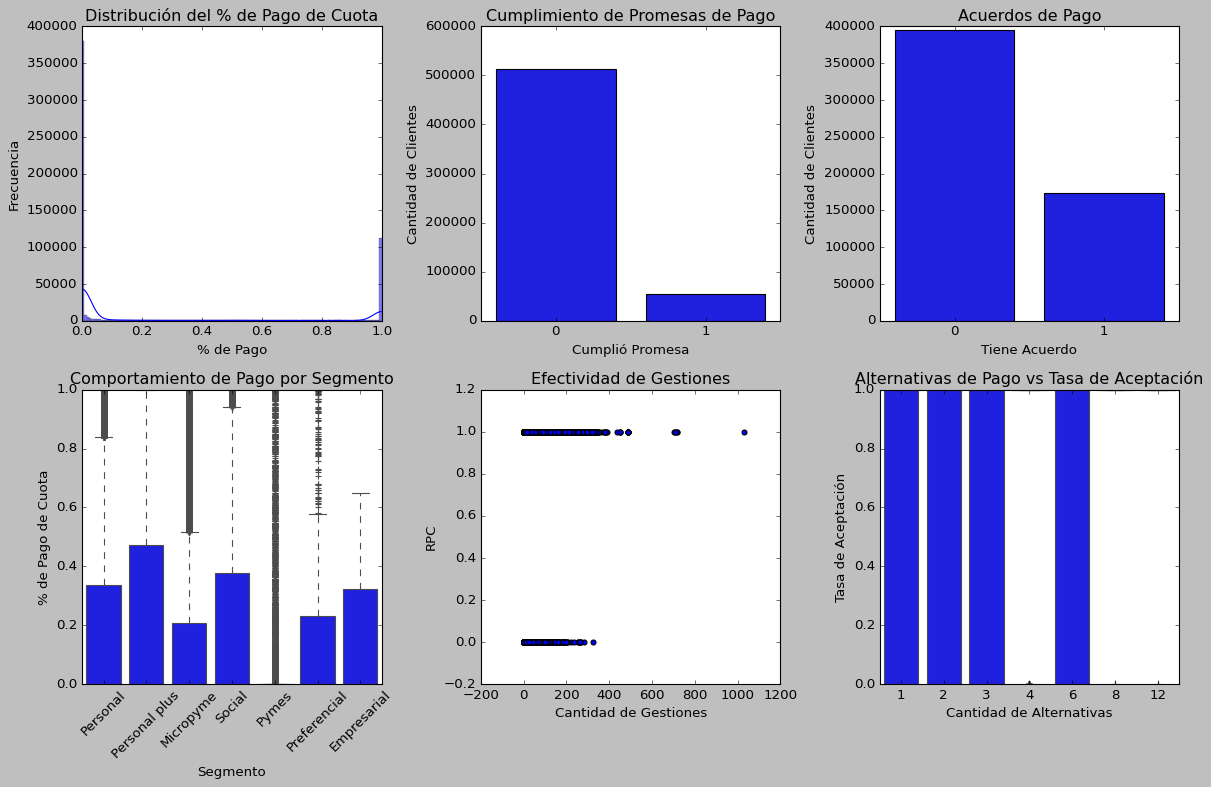

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('classic')
plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
sns.histplot(df['porc_pago_cuota'], kde=True)
plt.title('Distribución del % de Pago de Cuota')
plt.xlabel('% de Pago')
plt.ylabel('Frecuencia')


plt.subplot(2, 3, 2)
sns.countplot(x='cant_promesas_cumplidas_binario', data=df)
plt.title('Cumplimiento de Promesas de Pago')
plt.xlabel('Cumplió Promesa')
plt.ylabel('Cantidad de Clientes')


plt.subplot(2, 3, 3)
sns.countplot(x='cant_acuerdo_binario', data=df)
plt.title('Acuerdos de Pago')
plt.xlabel('Tiene Acuerdo')
plt.ylabel('Cantidad de Clientes')

plt.subplot(2, 3, 4)
sns.boxplot(x='segmento', y='porc_pago_cuota', data=df)
plt.title('Comportamiento de Pago por Segmento')
plt.xlabel('Segmento')
plt.ylabel('% de Pago de Cuota')
plt.xticks(rotation=45)


plt.subplot(2, 3, 5)
plt.scatter(df['cant_gestiones'], df['rpc'])
plt.title('Efectividad de Gestiones')
plt.xlabel('Cantidad de Gestiones')
plt.ylabel('RPC')

plt.subplot(2, 3, 6)
sns.boxplot(x='cant_alter_posibles', y='var_rpta_alt', data=df)
plt.title('Alternativas de Pago vs Tasa de Aceptación')
plt.xlabel('Cantidad de Alternativas')
plt.ylabel('Tasa de Aceptación')

plt.tight_layout()
plt.savefig('latex/business_analysis.png')
plt.show()


Los resultados del análisis nos proporcionan información valiosa sobre el comportamiento de los clientes y la efectividad de las estrategias de cobranza. Aquí están algunos puntos clave:

Las promesas de pago cumplidas son un fuerte indicador de la aceptación de opciones de pago.
Curiosamente, los clientes sin acuerdos de pago previos son más propensos a aceptar nuevas opciones.
Los segmentos 'Personal' y 'Personal plus' muestran las tasas más altas de aceptación.
Existe una correlación negativa entre el número de gestiones y la probabilidad de aceptación.
Los clientes con alto RPC pero baja tasa de pago son menos propensos a aceptar opciones de pago.




# Impacto del Nivel de Deuda en la Tasa de Aceptación:

1. La tasa de aceptación varía significativamente según el cuartil de deuda, alcanzando su punto más alto en el tercer cuartil y disminuyendo ligeramente en el cuarto. Esto sugiere que la deuda tiene un impacto considerable en la probabilidad de aceptación, con un umbral a partir del cual la aceptación disminuye.
Segmentos y Productos con Mayor Tasa de Aceptación en Deuda Alta:

2. Dentro del cuartil de deuda más alto, el segmento "Pymes" con el producto "Libranza" tiene una tasa de aceptación del 100%, mientras que otros productos como "Tarjeta de Crédito" en diferentes segmentos también muestran altas tasas de aceptación. Esto indica que ciertos productos y segmentos son más propensos a ser aceptados en clientes con deudas más altas.
Relación entre Promesas Cumplidas y Tasa de Aceptación:

3. La correlación más fuerte con la tasa de aceptación es el cumplimiento de promesas de pago, indicando que los clientes que cumplen con sus promesas tienen una mayor probabilidad de ser aceptados.
Significancia Estadística en la Variación de Tasa de Aceptación por Cuartiles de Deuda:

4. El análisis ANOVA muestra que las diferencias en las tasas de aceptación entre los diferentes cuartiles de deuda son estadísticamente significativas, reforzando la importancia del nivel de deuda como un factor determinante.
Diferencia Significativa en Tasa de Aceptación entre Grupos con Alto RPC y Bajo Pago vs Otros:

5. La prueba T revela que hay una diferencia significativa en la tasa de aceptación entre los clientes con alto RPC y bajo pago en comparación con otros grupos, lo que sugiere que este factor es crucial en la toma de decisiones de aceptación.


In [20]:
df.to_csv('processed_files/train_md.csv', index=False)